In [6]:
import numpy as np
from sklearn.svm import SVC,SVR
import pandas as pd
from ISLP import load_data,confusion_table
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
from matplotlib.pyplot import subplots,cm
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
import seaborn as sns

In [7]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Question 4

<Axes: >

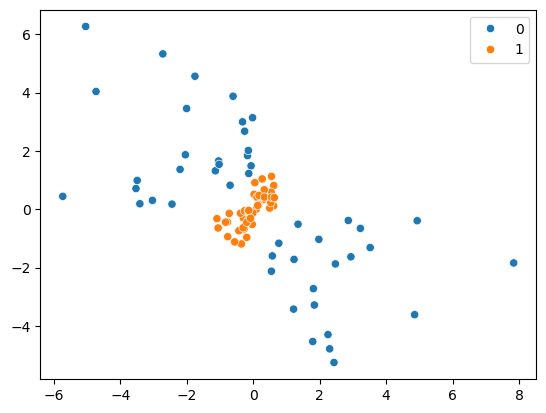

In [48]:
rng=np.random.default_rng(seed=12)
X=rng.standard_normal((100,2))
y=np.where((X[:,0])*(X[:,1])>0,1,0)
X[y==1]*=0.5
X[y==0]*=3
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [81]:
idx=np.random.choice(range(0,100),size=25,replace=False)
mask = np.ones(100, dtype=bool)
mask[idx] = False
X_test=X[idx];X_train=X[mask];y_test=y[idx];y_train=y[mask]
X_train.shape,X_test.shape

((75, 2), (25, 2))

## SVC - linear

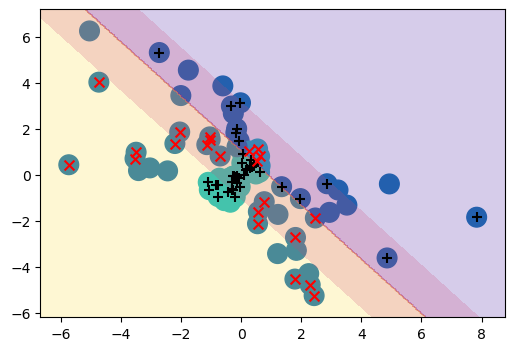

In [91]:
svm_linear = SVC(C=100, kernel='linear')
svm_linear.fit(X_train, y_train)
fig , ax = subplots(figsize =(6 ,4))
plot_svm(X,y,svm_linear ,ax=ax);

In [92]:
confusion_table(svm_linear.predict(X_test),y_test)

Truth,0,1
Predicted,,
0,2,1
1,9,13


In [106]:
kfold = skm.KFold(5,random_state =0,shuffle=True)
param_grid={'C':np.linspace(1,10000,100)}
grid = skm.GridSearchCV(svm_linear ,param_grid=param_grid ,refit=True ,cv=kfold ,scoring='accuracy')
grid.fit(X_train, y_train)
best_lin=grid.best_estimator_
confusion_table(best_lin.predict(X_test),y_test)

KeyboardInterrupt: 

## SCV -Rbf

In [101]:
svm_rbf = SVC(C=100, kernel='rbf')
kfold = skm.KFold(5,random_state =0,shuffle=True)
param_grid={'C':np.linspace(1,1000,100),'gamma':[0.5,1,2,3,4]}
grid = skm.GridSearchCV(svm_rbf ,param_grid=param_grid ,refit=True ,cv=kfold ,scoring='accuracy')
grid.fit(X_train, y_train)
best_rbf=grid.best_estimator_
confusion_table(best_rbf.predict(X_test),y_test)

Truth,0,1
Predicted,,
0,11,0
1,0,14


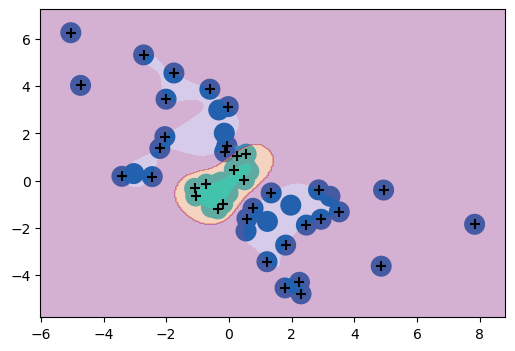

In [102]:
fig , ax = subplots(figsize =(6 ,4))
plot_svm(X_train,y_train,best_rbf,ax=ax);

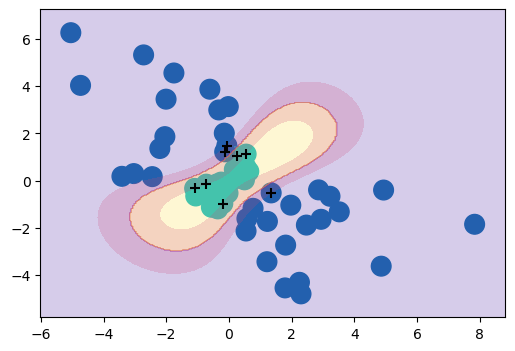

In [100]:
fig , ax = subplots(figsize =(6 ,4))
plot_svm(X_train,y_train,best ,ax=ax);

## SVC-Poly

In [103]:
svm_poly = SVC(C=100, kernel='poly')
kfold = skm.KFold(5,random_state =0,shuffle=True)
param_grid={'C':np.linspace(1,1000,100),'degree':[1,2,3]}
grid = skm.GridSearchCV(svm_poly ,param_grid=param_grid ,refit=True ,cv=kfold ,scoring='accuracy')
grid.fit(X_train, y_train)
best_poly=grid.best_estimator_
confusion_table(best_poly.predict(X_test),y_test)

Truth,0,1
Predicted,,
0,11,0
1,0,14


In [105]:
best

SVC(C=61.54545454545455, degree=2, kernel='poly')

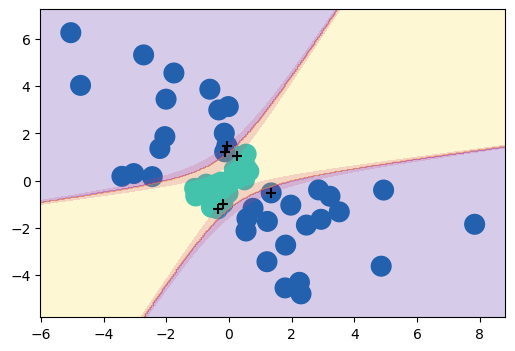

In [104]:
fig , ax = subplots(figsize =(6 ,4))
plot_svm(X_train,y_train,best ,ax=ax);

# Question 5

In [107]:
rng = np.random.default_rng (5)
x1 = rng.uniform(size =500) - 0.5
x2 = rng.uniform(size =500) - 0.5
y = x1**2 - x2**2 > 0

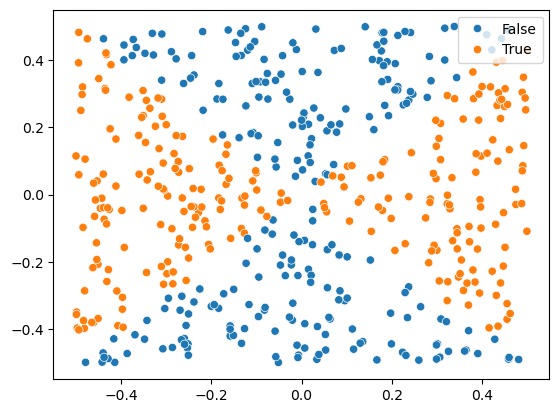

In [109]:
sns.scatterplot(x=x1,y=x2,hue=y);

In [142]:
df=pd.DataFrame(data=[x1,x2,y],index=['x1','x2','y']).T.astype(float)

## C-D

In [145]:
idx=np.random.choice(range(0,500),size=0,replace=False)
mask = np.arange(0,500)
mask = np.delete(mask,idx)
X_test=df.iloc[idx].drop(columns='y')
X_train=df.iloc[mask].drop(columns='y')
y_test=df.iloc[idx]['y']
y_train=df.iloc[mask]['y']
X_train.shape,X_test.shape,y_test.shape

((500, 2), (0, 2), (0,))

In [147]:
log_reg=LogisticRegression(C=1e30,solver='liblinear')
log_reg.fit(X_train,y_train)
confusion_table(log_reg.predict(X_train),y_train)

Truth,0.0,1.0
Predicted,,
0.0,65,104
1.0,182,149


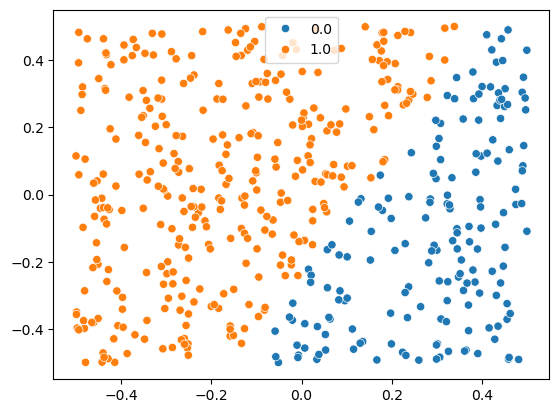

In [148]:
sns.scatterplot(x=x1,y=x2,hue=log_reg.predict(X_train));

## E-F

In [155]:
poly_f=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_f.fit_transform(df[['x1','x2']])
X_poly=pd.DataFrame(X_poly,columns=['x1','x2','x1**2','x1*x2','x2**2'])
X_poly['logx1']=np.log(np.abs(x1))
X_poly['logx2']=np.log(np.abs(x2))

### Log Reg fit in quadratic

In [163]:
df=X_poly.drop(columns=['logx1','logx2'])
idx=np.random.choice(range(0,500),size=0,replace=False)
mask = np.arange(0,500)
mask = np.delete(mask,idx)
X_test=df.iloc[idx]
X_train=df.iloc[mask]
y_test=y[idx]
y_train=y[mask]
X_train.shape,X_test.shape,y_test.shape

((500, 5), (0, 5), (0,))

In [164]:
log_reg=LogisticRegression(C=1e30,solver='liblinear')
log_reg.fit(X_train,y_train)
confusion_table(log_reg.predict(X_train),y_train)

Truth,False,True
Predicted,,
False,247,0
True,0,253


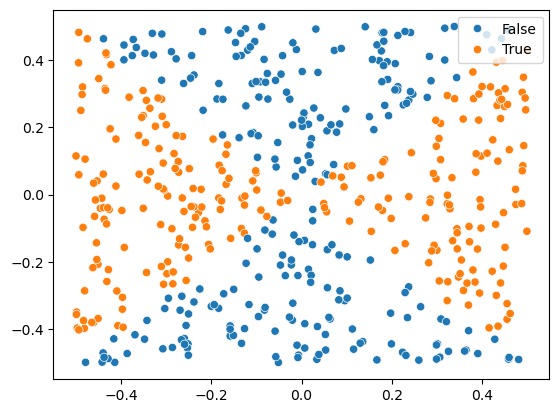

In [165]:
sns.scatterplot(x=x1,y=x2,hue=log_reg.predict(X_train));

### Log Reg Fit in logrithmic model

In [166]:
df=X_poly[['logx1','logx2']]
idx=np.random.choice(range(0,500),size=0,replace=False)
mask = np.arange(0,500)
mask = np.delete(mask,idx)
X_test=df.iloc[idx]
X_train=df.iloc[mask]
y_test=y[idx]
y_train=y[mask]
X_train.shape,X_test.shape,y_test.shape

((500, 2), (0, 2), (0,))

In [167]:
log_reg=LogisticRegression(C=1e30,solver='liblinear')
log_reg.fit(X_train,y_train)
confusion_table(log_reg.predict(X_train),y_train)

Truth,False,True
Predicted,,
False,247,0
True,0,253


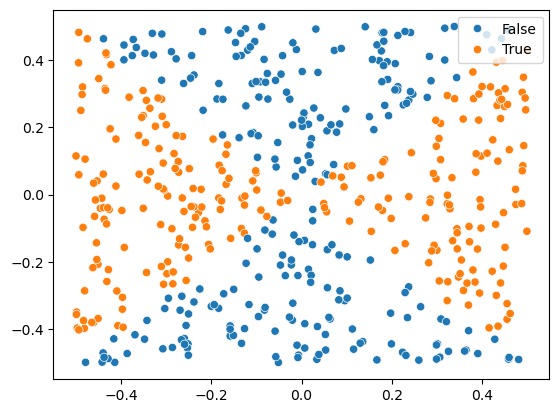

In [168]:
sns.scatterplot(x=x1,y=x2,hue=log_reg.predict(X_train));

## G

In [173]:
y_=np.where(y==True,1,-1)
df=pd.DataFrame(data=[x1,x2,y_],index=['x1','x2','y']).T
idx=np.random.choice(range(0,500),size=125,replace=False)
mask = np.arange(0,500)
mask = np.delete(mask,idx)
X_test=df.iloc[idx].drop(columns='y')
X_train=df.iloc[mask].drop(columns='y')
y_test=df.iloc[idx]['y']
y_train=df.iloc[mask]['y']
X_train.shape,X_test.shape,y_test.shape

((375, 2), (125, 2), (125,))

In [174]:
svm_linear=SVC(kernel='linear')
kfold = skm.KFold(5,random_state =0,shuffle=True)
param_grid={'C':np.linspace(1,10000,100)}
grid = skm.GridSearchCV(svm_linear ,param_grid=param_grid ,refit=True ,cv=kfold ,scoring='accuracy')
grid.fit(X_train, y_train)
best_lin=grid.best_estimator_
confusion_table(best_lin.predict(X_test),y_test)

Truth,-1.0,1.0
Predicted,,
-1.0,52,73
1.0,0,0


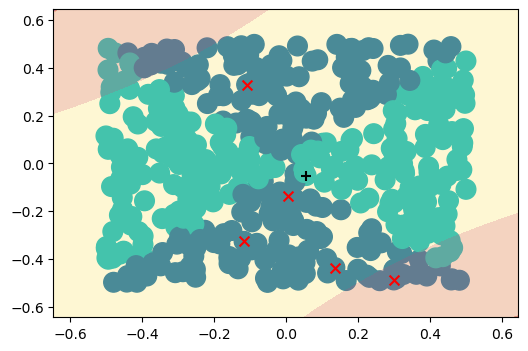

In [183]:
fig , ax = subplots(figsize =(6 ,4))
plot_svm(df[['x1','x2']],df['y'],best ,ax=ax);

## H

In [184]:
svm_linear=SVC(kernel='poly')
kfold = skm.KFold(5,random_state =0,shuffle=True)
param_grid={'C':np.linspace(1,10000,100)}
grid = skm.GridSearchCV(svm_linear ,param_grid=param_grid ,refit=True ,cv=kfold ,scoring='accuracy')
grid.fit(X_train, y_train)
best_lin=grid.best_estimator_
confusion_table(best_lin.predict(X_test),y_test)

KeyboardInterrupt: 

In [ ]:
fig , ax = subplots(figsize =(6 ,4))
plot_svm(df[['x1','x2']],df['y'],best ,ax=ax);

# Question 6

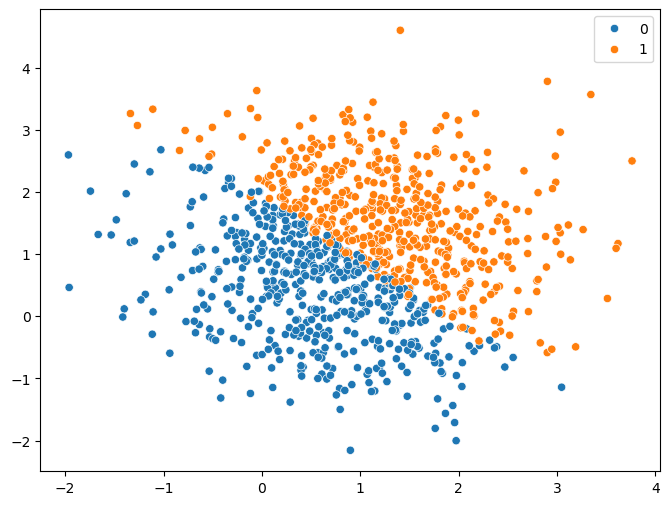

In [195]:
rng=np.random.default_rng(seed=12)
X=rng.standard_normal((1000,2))
y=np.where((X[:,0])+(X[:,1])>0,1,0)
X[y==1]+=0.9
X[y==0]+=1
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y);

In [197]:
svm_linear=SVC(kernel='linear')
kfold = skm.KFold(5,random_state =0,shuffle=True)
param_grid={'C':np.linspace(1,1000,100)}
grid = skm.GridSearchCV(svm_linear ,param_grid=param_grid ,refit=True ,cv=kfold ,scoring='accuracy')
grid.fit(X, y)
best_lin=grid.best_estimator_
confusion_table(best_lin.predict(X),y)

Truth,0,1
Predicted,,
0,479,36
1,20,465


In [201]:
grid.best_params_

{'C': 1.0}

In [207]:
classification_error=1000-(grid.cv_results_['mean_test_score']*1000)
classification_error

array([54., 58., 57., 56., 56., 57., 58., 57., 59., 58., 57., 57., 57.,
       57., 57., 57., 57., 57., 57., 57., 57., 56., 56., 56., 56., 56.,
       56., 56., 56., 56., 56., 56., 56., 56., 56., 55., 56., 55., 55.,
       55., 56., 56., 55., 55., 55., 56., 56., 55., 55., 55., 56., 55.,
       55., 55., 56., 55., 56., 55., 55., 56., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55.])

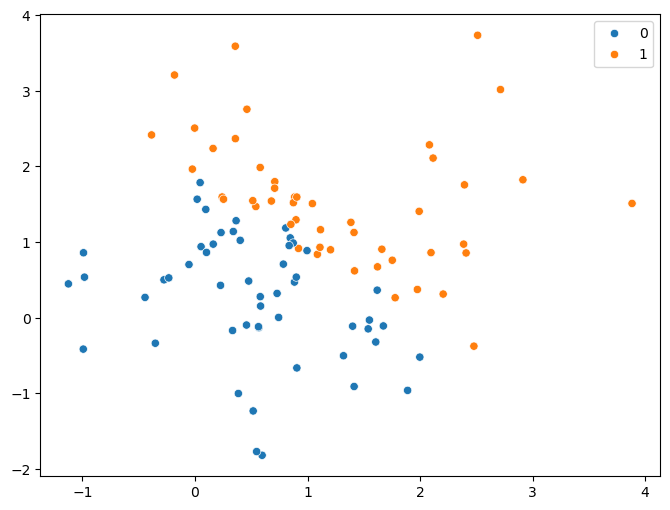

In [218]:
rng=np.random.default_rng(seed=18)
X_test=rng.standard_normal((100,2))
y_test=np.where((X_test[:,0])+(X_test[:,1])>0,1,0)
X_test[y_test==1]+=0.9
X_test[y_test==0]+=1
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=y_test);

In [226]:
classification_error=[]
for c in grid.cv_results_['param_C']:
    svm_linear=SVC(kernel='linear',C=c)
    svm_linear.fit(X, y)
    classification_error.append(1-accuracy_score(y_test,svm_linear.predict(X_test)))

In [231]:
np.array(classification_error)*1000

array([50., 60., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50.])

# Question 7

In [242]:
Auto=load_data('Auto')
y=np.where(Auto['mpg']>Auto['mpg'].median(),1,0)
Auto=Auto.reset_index(drop=True).drop('mpg',axis=1)
print(Auto.shape)
Auto[:2]

(392, 7)


,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1


In [244]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(Auto, y)
confusion_table(svm_linear.predict(Auto),y)

Truth,0,1
Predicted,,
0,174,15
1,22,181


In [240]:
svm_linear=SVC(kernel='linear')
kfold = skm.KFold(5,random_state =0,shuffle=True)
param_grid={'C':np.linspace(1,1000,100)}
grid = skm.GridSearchCV(svm_linear ,param_grid=param_grid ,refit=True ,cv=kfold ,scoring='accuracy')
grid.fit(Auto, y)
best_lin=grid.best_estimator_
confusion_table(best_lin.predict(Auto),y)

KeyboardInterrupt: 

In [ ]:
fig , ax = subplots(figsize =(8 ,6))
plot_svm(X_train ,y_train ,best_svm ,ax=ax)

In [238]:
svm_poly=SVC(kernel='poly')
kfold = skm.KFold(5,random_state =0,shuffle=True)
param_grid={'C':np.linspace(1,100,10),'degree':[1,2,3,4]}
grid = skm.GridSearchCV(svm_poly ,param_grid=param_grid ,refit=True ,cv=kfold ,scoring='accuracy')
grid.fit(Auto, y)
best_poly=grid.best_estimator_
confusion_table(best_poly.predict(Auto),y)

In [ ]:
svm_rad=SVC(kernel='rbf')
kfold = skm.KFold(5,random_state =0,shuffle=True)
param_grid={'C':np.linspace(1,100,10),'gamma':[0.5,1,2,3,4]}
grid = skm.GridSearchCV(svm_rad ,param_grid=param_grid ,refit=True ,cv=kfold ,scoring='accuracy')
grid.fit(Auto, y)
best_rad=grid.best_estimator_
confusion_table(best_rad.predict(Auto),y)

# Question 8

In [8]:
OJ=load_data('OJ')
OJ['Store7']=np.where(OJ['Store7']=='No',0,1)
OJ[:2]

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.0,0.0,0,0,0.5,1.99,1.75,0.24,0,0.000000,0.0,0.24,1
1,CH,239,1,1.75,1.99,0.0,0.3,0,1,0.6,1.69,1.75,-0.06,0,0.150754,0.0,0.24,1


In [9]:
X=OJ.drop(columns='Purchase')
y=OJ['Purchase']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=800,random_state=12)

In [11]:
y_train_=np.where(y_train=='CH',1,-1)

In [12]:
svm_linear=SVC(kernel='linear',C=0.01)
svm_linear.fit(np.asarray(X_train), y_train_)

SVC(C=0.01, kernel='linear')

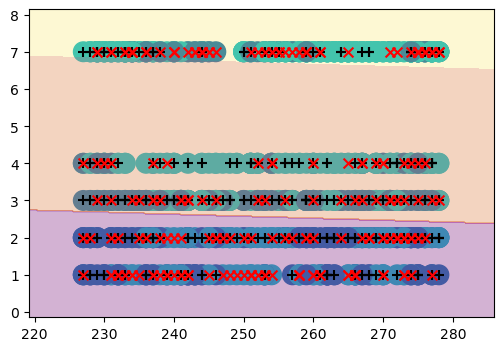

In [13]:
y_train_=np.where(y_train=='CH',1,-1)
fig , ax = subplots(figsize =(6 ,4))
plot_svm(np.asarray(X_train),y_train_,svm_linear ,ax=ax);

In [15]:
svm_linear=SVC(kernel='linear',C=0.01)
svm_linear.fit(X_train, y_train)
err=1-accuracy_score(svm_linear.predict(X_train),y_train)
print(f'Training error = {err}')
err=1-accuracy_score(svm_linear.predict(X_test),y_test)
print(f'Training error = {err}')
confusion_table(svm_linear.predict(X_train),y_train)

Training error = 0.25875000000000004
Training error = 0.25555555555555554


Truth,CH,MM
Predicted,,
CH,385,114
MM,93,208


In [17]:
svm_linear=SVC(kernel='linear',C=6.67)
svm_linear.fit(X_train, y_train)
err=1-accuracy_score(svm_linear.predict(X_train),y_train)
print(f'Training error = {err}')
err=1-accuracy_score(svm_linear.predict(X_test),y_test)
print(f'Training error = {err}')
confusion_table(svm_linear.predict(X_train),y_train)

Training error = 0.15874999999999995
Training error = 0.16296296296296298


Truth,CH,MM
Predicted,,
CH,421,70
MM,57,252


In [ ]:
acc_c=[0,float('inf')]
for c in np.linspace(0.01,10,5):
    print(c)
    svm_linear=SVC(kernel='linear',C=c)
    # kfold = skm.KFold(5,random_state =0,shuffle=True)
    acc=np.mean(cross_val_score(svm_linear,X_train, y_train,scoring='accuracy'))
    # print(acc)
    if acc>acc_c[0]:
        acc_c[0]=acc;acc_c[1]=c

0.01
2.5075
5.005


In [ ]:
svm_linear=SVC(kernel='linear',C=1)
kfold = skm.KFold(5,random_state =0,shuffle=True)
param_grid={'C':np.linspace(0.01,10,10)}
grid = skm.GridSearchCV(svm_linear ,param_grid=param_grid ,refit=True ,cv=kfold ,scoring='accuracy')
grid.fit(X_train, y_train)
best_lin=grid.best_estimator_
confusion_table(best_lin.predict(X_test),y)

# F

In [ ]:
y_train_=np.where(y_train=='CH',1,-1)
svm_rad=SVC(kernel='rbf',C=0.01)
svm_rad.fit(np.asarray(X_train), y_train_)
fig , ax = subplots(figsize =(6 ,4))
plot_svm(np.asarray(X_train),y_train_,svm_rad ,ax=ax);

In [ ]:
svm_rad=SVC(kernel='rbf',C=0.01)
svm_rad.fit(X_train, y_train)
err=1-accuracy_score(svm_rad.predict(X_train),y_train)
print(f'Training error = {err}')
err=1-accuracy_score(svm_rad.predict(X_test),y_test)
print(f'Testing error = {err}')
confusion_table(svm_rad.predict(X_train),y_train)

In [ ]:
svm_rad=SVC(kernel='rbf',C=0.01)
kfold = skm.KFold(5,random_state =0,shuffle=True)
param_grid={'C':np.linspace(0.01,10,10)}
grid = skm.GridSearchCV(svm_rad ,param_grid=param_grid ,refit=True ,cv=kfold ,scoring='accuracy')
grid.fit(X_train, y_train)
best_rad=grid.best_estimator_
confusion_table(best_rad.predict(X_test),y)

In [ ]:
err=1-accuracy_score(best_rad.predict(X_train),y_train)
print(f'Training error = {err}')
err=1-accuracy_score(best_rad.predict(X_test),y_test)
print(f'Testing error = {err}')

## G

In [ ]:
y_train_=np.where(y_train=='CH',1,-1)
svm_poly=SVC(kernel='poly',C=0.01)
svm_poly.fit(np.asarray(X_train), y_train_)
fig , ax = subplots(figsize =(6 ,4))
plot_svm(np.asarray(X_train),y_train_,svm_poly ,ax=ax);

In [ ]:
svm_poly=SVC(kernel='poly',C=0.01)
svm_poly.fit(X_train, y_train)
err=1-accuracy_score(svm_poly.predict(X_train),y_train)
print(f'Training error = {err}')
err=1-accuracy_score(svm_poly.predict(X_test),y_test)
print(f'Testing error = {err}')
confusion_table(svm_poly.predict(X_train),y_train)

In [ ]:
svm_poly=SVC(kernel='poly',C=0.01)
kfold = skm.KFold(5,random_state =0,shuffle=True)
param_grid={'C':np.linspace(0.01,10,10)}
grid = skm.GridSearchCV(svm_poly ,param_grid=param_grid ,refit=True ,cv=kfold ,scoring='accuracy')
grid.fit(X_train, y_train)
best_poly=grid.best_estimator_
confusion_table(best_poly.predict(X_test),y)

In [ ]:
err=1-accuracy_score(best_poly.predict(X_train),y_train)
print(f'Training error = {err}')
err=1-accuracy_score(best_poly.predict(X_test),y_test)
print(f'Testing error = {err}')